# House Price Prediction Project



### ---- Define the problem ----


In [ ]:
'''This script pulls in Housing data, builds and tests several predictive models,
   and then makes Housing Price predictions on test data using the best model.'''
   
__author__ = 'Kartik Athale'
__email__ = 'Kartik.athale@outlook.com'


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVR

import warnings
warnings.filterwarnings('ignore')





### ---- Load the data ----

In [2]:
housingData = pd.read_csv('data/useThisDatasetToBuildModel.csv')
housingDataToPredict = pd.read_csv('data/useThisDatasetToPredict.csv')

### --- Examine the Data ---
Load and Discover

In [42]:
# First 5 Rows from training Dataset.
housingData.head()

,longitude,latitude,medianAge,totalRooms,bedrooms,population,households,medianIncome,medianHouseValue,oceanProximity
0,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
1,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
2,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
3,-122.25,37.84,52,2535,489,1094,514,3.6591,299200,NEAR BAY
4,-122.25,37.84,52,3104,687,1157,647,3.1200,241400,NEAR BAY


In [43]:
# First 5 Rows from Test Dataset.
housingDataToPredict.head()

,longitude,latitude,medianAge,totalRooms,bedrooms,population,households,medianIncome,oceanProximity
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY
1,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY
2,-122.25,37.85,52,919,213,413,193,4.0368,NEAR BAY
3,-122.26,37.85,50,1120,283,697,264,2.1250,NEAR BAY
4,-122.27,37.85,52,1966,347,793,331,2.7750,NEAR BAY


Use .info() to see length and dtypes

In [44]:
housingData.info()
print()
print('# Housing Data Shape:', housingData.shape) ## 14347 rows and 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14347 entries, 0 to 14346
Data columns (total 10 columns):
longitude           14347 non-null float64
latitude            14347 non-null float64
medianAge           14347 non-null int64
totalRooms          14347 non-null int64
bedrooms            14347 non-null int64
population          14347 non-null int64
households          14347 non-null int64
medianIncome        14347 non-null float64
medianHouseValue    14347 non-null int64
oceanProximity      14347 non-null object
dtypes: float64(3), int64(6), object(1)
memory usage: 1.1+ MB

# Housing Data Shape: (14347, 10)


In [45]:
# Need to Predict medianHouseValue for this Dataset.
# This Test Dataset seems to have similar and expected columns ## 6086 rows and 9 columns
housingDataToPredict.info()
print()
print('# Housing Data Predict Shape:', housingDataToPredict.shape) 
# oceanProximity is Object type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6086 entries, 0 to 6085
Data columns (total 9 columns):
longitude         6086 non-null float64
latitude          6086 non-null float64
medianAge         6086 non-null int64
totalRooms        6086 non-null int64
bedrooms          6086 non-null int64
population        6086 non-null int64
households        6086 non-null int64
medianIncome      6086 non-null float64
oceanProximity    6086 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 428.0+ KB

# Housing Data Predict Shape: (6086, 9)


In [46]:
pd.unique(housingData['bedrooms'])
#Observing bedrooms columns, this data variables seems to be masked.

array([1106,  190,  280, ..., 2640, 1052, 1856])

### ----- Clean the Data -----
#### Checking for Duplicate data (There is None)

In [47]:
# Duplicate Entry for Train Data
housingData.duplicated().sum()

0

In [48]:
# Duplicate Entry for Test Data
housingDataToPredict.duplicated().sum()

0

#### Checking for missing values
Note there are No missing values for Train and Test Data set.

In [49]:
housingData.isnull().sum()

longitude           0
latitude            0
medianAge           0
totalRooms          0
bedrooms            0
population          0
households          0
medianIncome        0
medianHouseValue    0
oceanProximity      0
dtype: int64

In [50]:
housingDataToPredict.isnull().sum()

longitude         0
latitude          0
medianAge         0
totalRooms        0
bedrooms          0
population        0
households        0
medianIncome      0
oceanProximity    0
dtype: int64

### ---- EDA (Exploratory Data Analysis) ----

use corr() function to find the correlation among the columns

In [4]:
housingData.corr(method ='pearson') 
## We notice that median income is strongly correlated with median House value, followed by total rooms and median age.

,longitude,latitude,medianAge,totalRooms,bedrooms,population,households,medianIncome,medianHouseValue
longitude,1.000000,-0.925486,-0.113150,0.043123,0.067238,0.100398,0.053727,-0.013178,-0.045552
latitude,-0.925486,1.000000,0.017669,-0.035655,-0.066938,-0.109409,-0.070296,-0.081769,-0.145125
medianAge,-0.113150,0.017669,1.000000,-0.360127,-0.317004,-0.293783,-0.298755,-0.120651,0.101994
totalRooms,0.043123,-0.035655,-0.360127,1.000000,0.928891,0.852882,0.919542,0.200106,0.133720
bedrooms,0.067238,-0.066938,-0.317004,0.928891,1.000000,0.874331,0.981348,-0.008745,0.051974
population,0.100398,-0.109409,-0.293783,0.852882,0.874331,1.000000,0.901575,0.003010,-0.028193
households,0.053727,-0.070296,-0.298755,0.919542,0.981348,0.901575,1.000000,0.012340,0.066503
medianIncome,-0.013178,-0.081769,-0.120651,0.200106,-0.008745,0.003010,0.012340,1.000000,0.685675
medianHouseValue,-0.045552,-0.145125,0.101994,0.133720,0.051974,-0.028193,0.066503,0.685675,1.000000


In [52]:
housingData.describe(include = [np.number])

,longitude,latitude,medianAge,totalRooms,bedrooms,population,households,medianIncome,medianHouseValue
count,14347.000000,14347.000000,14347.000000,14347.000000,14347.000000,14347.00000,14347.000000,14347.000000,14347.00000
mean,-119.585388,35.645099,28.685509,2613.953440,534.656026,1417.09082,496.986548,3.855934,206162.46386
std,2.006099,2.136650,12.618017,2114.055576,414.032843,1113.02647,378.208602,1.872313,115110.19972
min,-124.300000,32.540000,1.000000,6.000000,1.000000,3.00000,1.000000,0.499900,14999.00000
25%,-121.800000,33.940000,18.000000,1449.500000,296.000000,788.50000,280.000000,2.562500,118800.00000
50%,-118.510000,34.260000,29.000000,2112.000000,433.000000,1164.00000,409.000000,3.530200,178900.00000
75%,-118.010000,37.720000,37.000000,3124.000000,641.000000,1718.00000,600.000000,4.736400,264300.00000
max,-114.310000,41.950000,52.000000,37937.000000,5471.000000,35682.00000,5189.000000,15.000100,500001.00000


### Visualize target variable (medianHouseValue)

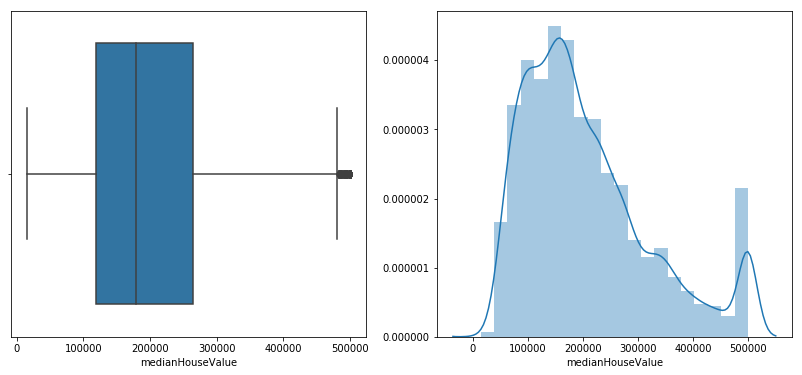

In [5]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(housingData['medianHouseValue'])
plt.subplot(1,2,2)
sns.distplot(housingData['medianHouseValue'], bins = 20)
plt.show()
## DAtaset doesnt have any bad data like $0 value etc.

In [53]:
## Observing the categorical variable, oceanProximity.
pd.unique(housingData['oceanProximity'])

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [27]:
## Check the same values in Test Dataset (they are same)
pd.unique(housingDataToPredict['oceanProximity'])

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

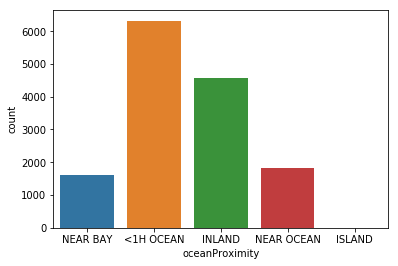

In [54]:
sns.countplot(x='oceanProximity', data=housingData)

In [6]:
## Transforming categorical column into Numeric for Data Modeling.
housingData.oceanProximity.replace('NEAR BAY','0',inplace=True)
housingData.oceanProximity.replace('<1H OCEAN','1',inplace=True)
housingData.oceanProximity.replace('INLAND','2',inplace=True)
housingData.oceanProximity.replace('NEAR OCEAN','3',inplace=True)
housingData.oceanProximity.replace('ISLAND','3',inplace=True)

In [7]:
housingData.head()

,longitude,latitude,medianAge,totalRooms,bedrooms,population,households,medianIncome,medianHouseValue,oceanProximity
0,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,0
1,-122.24,37.85,52,1467,190,496,177,7.2574,352100,0
2,-122.25,37.85,52,1627,280,565,259,3.8462,342200,0
3,-122.25,37.84,52,2535,489,1094,514,3.6591,299200,0
4,-122.25,37.84,52,3104,687,1157,647,3.1200,241400,0


In [8]:
housingData.oceanProximity = housingData.oceanProximity.astype('int')
print("Data type for oceanProximity column:", housingData.oceanProximity.dtypes)

Data type for oceanProximity column: int64


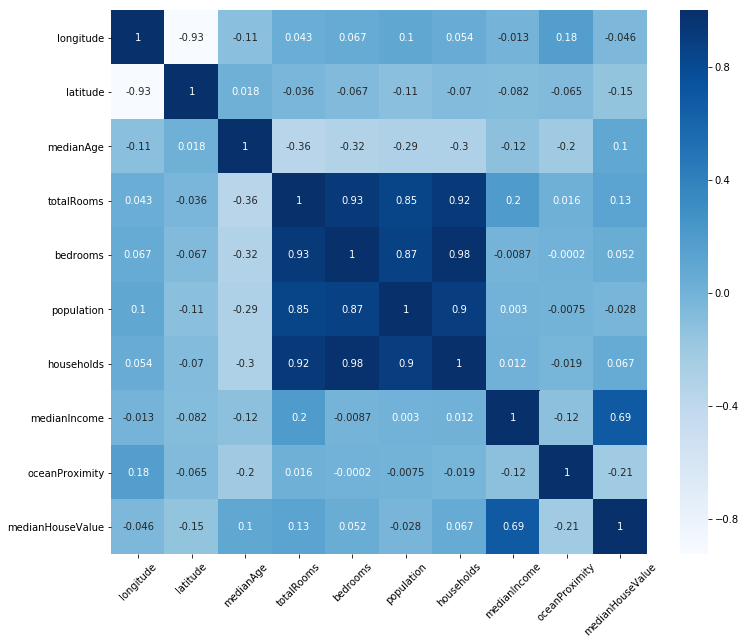

In [9]:
# Correlations between selected features and response

fig = plt.figure(figsize=(12, 10))
features = ['longitude','latitude','medianAge','totalRooms','bedrooms','population','households','medianIncome','oceanProximity']
sns.heatmap(housingData[features + ['medianHouseValue']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

We notice that median income is strongly correlated with median House value, followed by total rooms and median age.

In [10]:
# Set your factors and response
factors = housingData[['longitude','latitude','medianAge','totalRooms','bedrooms','population','households','medianIncome','oceanProximity']]
response = housingData['medianHouseValue']

In [11]:
# Build your train and test datasets


testSize = 0.2
trainFactors, testFactors, trainResponse, testResponse = train_test_split(factors, response, test_size=testSize, random_state=42)

#### ---- Building Models ----
## Linear Support Vector Regression

In [12]:
#Import LinearSVR
from sklearn.svm import LinearSVR

In [13]:
# Define the SVR object
lin_svr = LinearSVR(random_state=42)

In [14]:
# Build the model fit using the training set
lin_svr.fit(trainFactors, trainResponse)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [15]:
# Get the response for the test set
svrResponse = lin_svr.predict(testFactors)

In [16]:
# Get rSquare Value
from sklearn.metrics import r2_score
svrR2score = r2_score(svrResponse, testResponse)
svrR2score

-2.429510574057529

In [17]:
# RandomForest
#from sklearn.ensemble import RandomForestRegressor
randomForestModel = RandomForestRegressor(n_estimators=10, min_samples_split=2, verbose = True,random_state=82)
randomForestModel.fit(trainFactors, trainResponse)
randomForestResponse = randomForestModel.predict(testFactors)
randomForestR2score = r2_score(randomForestResponse, testResponse)
randomForestR2score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.7551124623198039

In [18]:
# Linear Regression
from sklearn.linear_model import LinearRegression

linearRegressionModel = LinearRegression()
# Train the model using the training sets
linearRegressionModel.fit(trainFactors, trainResponse)

# Make predictions using the testing set
linearRegressionResponse = linearRegressionModel.predict(testFactors)
linearRegressionR2score = r2_score(linearRegressionResponse, testResponse)
linearRegressionR2score

0.4691699158574404

In [19]:
# The coefficients
print('Coefficients: \n', linearRegressionModel.coef_)

Coefficients: 
 [-4.23996116e+04 -4.23541590e+04  1.06832572e+03 -8.21243770e+00
  1.26795858e+02 -3.66565401e+01  2.83541880e+01  4.03688889e+04
 -3.98201202e+03]


In [20]:
spotCheck = 410
print("Linear Regression: \n Predicted Price:  {}  \n   Actual Price:  {}".format(linearRegressionResponse[spotCheck], testResponse[spotCheck]))
print("Random Forest: \n Predicted Price:  {}  \n   Actual Price:  {}".format(randomForestResponse[spotCheck], testResponse[spotCheck]))
print("SVR: \n Predicted Price:  {}  \n   Actual Price:  {}".format(svrResponse[spotCheck], testResponse[spotCheck]))
## RandomForest is good among these 3 modesls.

Linear Regression: 
 Predicted Price:  164745.1073735198  
   Actual Price:  330200
Random Forest: 
 Predicted Price:  221320.0  
   Actual Price:  330200
SVR: 
 Predicted Price:  128935.68773079547  
   Actual Price:  330200


In [21]:
## Test further Models for better score
# Lasso Regession.

from sklearn.linear_model import Lasso

#lassoReg = Lasso(alpha=0.2, normalize=True, random_state=21) ## Gives same results even after changing alpha.
lassoReg = Lasso(random_state=20)
lassoReg.fit(trainFactors, trainResponse)

lassoResponse = lassoReg.predict(testFactors)

lassoRegR2score = r2_score(lassoResponse, testResponse)
lassoRegR2score

0.46915314620534554

In [22]:
## Ridge Regression.

from sklearn.linear_model import Ridge
#ridgeReg = Ridge(alpha=0.001, normalize=True) # It gives 0.465
ridgeReg = Ridge(random_state=21)
ridgeReg.fit(trainFactors, trainResponse)

ridgeResponse = ridgeReg.predict(testFactors)
#ridgeReg.score(testFactors,testResponse)
ridgeRegR2score = r2_score(ridgeResponse, testResponse)
ridgeRegR2score

0.4691088301381845

In [23]:
## Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=10, 
                                    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                    max_features='auto', random_state=2, max_leaf_nodes=None, 
                                    min_impurity_decrease=0.01, min_impurity_split=None, presort=False)

DTregressor.fit(trainFactors,trainResponse)
DTResponse = DTregressor.predict(testFactors)
DTR2score = r2_score(DTResponse, testResponse)
DTR2score

0.6443367388809095

In [24]:
## Gradient Boosting Regressor

from sklearn import ensemble
ensemblemodel = ensemble.GradientBoostingRegressor(n_estimators=145, max_depth = 4, min_samples_split = 2,
                                                    learning_rate = 0.2, loss = 'ls', random_state=43)

ensemblemodel.fit(trainFactors, trainResponse)

ensembleResponse = ensemblemodel.predict(testFactors)
ensembleR2score = r2_score(ensembleResponse, testResponse)
ensembleR2score

0.79625904580282

In [25]:
## ## Gradient Boosting Regressor - Tuning Parameters (has best R2 Score)
 

ensemblemodel1 = ensemble.GradientBoostingRegressor( init=None,
 learning_rate=0.15, loss='ls', max_depth=6,
   min_samples_leaf=4, n_estimators=600,  random_state=22,
  verbose=0)


ensemblemodel1.fit(trainFactors, trainResponse)

ensembleResponse1 = ensemblemodel1.predict(testFactors)
ensembleR2score1 = r2_score(ensembleResponse1, testResponse)
ensembleR2score1

0.8164043110512123

#### Median Income is most important  feature, followed by Ocean Proximity.

Text(0, 0.5, 'Feature Importance Score')

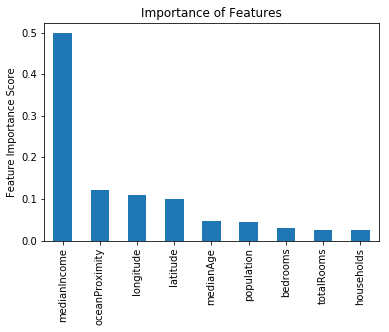

In [28]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

predictors=list(trainFactors)
feat_imp = pd.Series(ensemblemodel1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')


In [21]:
pd.unique(housingDataToPredict['oceanProximity'])

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### ---- Tuning the parameters ----

In [36]:
# Get best model to deploy.

bestModel = ensemble.GradientBoostingRegressor( init=None, learning_rate=0.15, loss='ls', max_depth=6,
                                                min_samples_leaf=1, n_estimators=600,  random_state=22,
                                                min_samples_split=2,verbose=0)


bestModel.fit(trainFactors, trainResponse)

bestModelResponse = bestModel.predict(testFactors)
bestModelR2score = r2_score(bestModelResponse, testResponse)
bestModelR2score

0.8197074820167098

### ---- Deploy & Automate Pipeline ----

In [37]:
def load_data(data_file):
    '''function to read a csv into a df'''
    return pd.read_csv(data_file)

def transform_data(df ):
    df.replace(cleanup_nums, inplace=True)
    
    return df



def get_factors(df,ftr_vars):
    
    return df[ftr_vars]


def get_target_df(df, target):
    '''returns target dataframe'''
    return df[target]





def get_predictions(model, df_predict):
    '''function to preprocess test_df and make predictions from features'''
   
    predictions = model.predict(df_predict)
    return predictions


def save_results(model, predictions):
    '''saves model, model summary, feature importances, and predictions'''
    with open('model.txt', 'w') as file:
        file.write(str(model))
    #feature_importances.to_csv('feature_importances.csv')
    predictions.to_csv('House_Prices_prediction.csv')

In [38]:
feature_vars = ['longitude','latitude','medianAge','totalRooms','bedrooms','population','households','medianIncome','oceanProximity']
target_var = 'medianHouseValue'
testSize = 0.2


cleanup_nums = {"oceanProximity":     {"NEAR BAY": 0, "<1H OCEAN": 1, "INLAND": 2,
                                      "NEAR OCEAN": 3, "ISLAND": 4 }}
                


print("Loading data")
housingData = load_data('data/useThisDatasetToBuildModel.csv')
housingDataToPredict = load_data('data/useThisDatasetToPredict.csv')

print("Transform Data - Ocean Proximity variable")
housingData = transform_data(housingData)
housingDataToPredict = transform_data(housingDataToPredict)

print("Factors and Target data ready for Modeling ")

factors = get_factors(housingData, feature_vars)
housingDataToPredict = get_factors(housingDataToPredict, feature_vars)



## Target Variable
response = get_target_df(housingData, target_var)



Loading data
Transform Data - Ocean Proximity variable
Factors and Target data ready for Modeling 


In [40]:
## Split Train and test
testSize = 0.2
trainFactors, testFactors, trainResponse, testResponse = train_test_split(factors, response, test_size=testSize, random_state=42)

## Best Model tuned with Parameters
bestModel = ensemble.GradientBoostingRegressor( init=None, learning_rate=0.15, loss='ls', max_depth=6,
                                                min_samples_leaf=1, n_estimators=600,  random_state=22,
                                                min_samples_split=2,verbose=0)

#train Best model and make predictions on housingDataToPredict dataset
bestModel.fit(trainFactors, trainResponse)

bestModelResponse = bestModel.predict(testFactors)
bestModelR2score = r2_score(bestModelResponse, testResponse)
print('Model with best R2score', bestModelR2score)

predictions = get_predictions(bestModel, housingDataToPredict)

predictedResults = pd.DataFrame(predictions)

save_results(bestModel, predictedResults)
print('Results for this House Price prediction project were saved to the drive..')

Model with best R2score 0.8202415597546666
Results for this House Price prediction project were saved to the drive..


#### --- R2 Score : 0.82